### Simulate Spatial System

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
def simulate_X(neighbor, num_points1, num_points2):
    np.random.seed(26)
    locations1 = np.random.rand(num_points1, 2) * 100
    locations2 = np.random.rand(num_points2, 2) * 100

    s1 = np.random.normal(50, 10, num_points1)
    # s2 = np.ones(num_points2) 
    s2 = np.random.normal(100, 50, num_points2)
    

    nbrs = NearestNeighbors(n_neighbors=neighbor).fit(locations2)
    distances, indices = nbrs.kneighbors(locations1)

    smoothed_s2 = np.zeros(num_points1)

    for i, neighbors in enumerate(indices):
        weights = np.exp(-distances[i] / np.max(distances[i]))
        smoothed_s2[i] = np.sum(s2[neighbors] * weights) / np.sum(weights)
    return smoothed_s2, locations1

X, loc1 = simulate_X(10, 100, 150) # use a neighbor of 10. Would see if model can recover this too. 

In [3]:
print(len(X))

100


In [4]:
print(X[:5])

[123.52798085 105.10624026  83.62942435 133.86956433  79.60390359]


In [5]:
def create_surface(locations, sigma):
    """Function to create spatially varying surface with a gradient pattern increasing linearly from 
        bottom left to the top right
    """
    x = locations[:, 0]
    y = locations[:, 1]

    B = x + y

    B_smoothed = gaussian_filter(B, sigma)
    return B_smoothed

b1 = create_surface(loc1, 3)

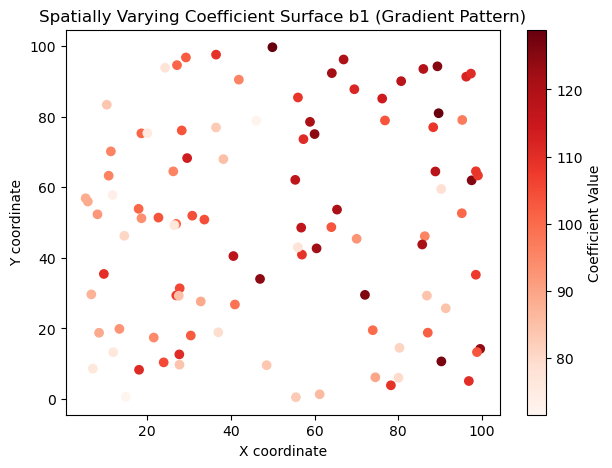

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(loc1[:, 0], loc1[:, 1], c=b1, cmap='Reds')
plt.colorbar(label='Coefficient Value')
plt.title('Spatially Varying Coefficient Surface b1 (Gradient Pattern)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

#### Generate y 

In [7]:
y = np.multiply(b1, X)

In [8]:
y 

array([12902.09859914, 10871.85022382,  8516.20624058, 13434.55742607,
        7945.0010561 , 11850.5794134 ,  8877.067267  , 11640.39162873,
       13598.91201723,  8305.93736065,  9780.23098293, 11145.5525478 ,
       15303.03109159, 10300.10894348, 12255.45813513, 11766.07584976,
       13507.23069402, 11429.24148776, 11365.69521959,  7776.5912203 ,
       10451.23647521, 13067.70874865, 13346.07346948,  8907.8494786 ,
       14186.13646084, 10826.4973791 ,  8404.62483849, 11578.16117464,
       11254.49296902,  9885.34687033, 10462.7200161 , 10264.27834654,
       11498.99669345, 12353.85207384, 13030.51560022, 11149.25203158,
        9839.86888869, 11338.03077765, 12154.06512763,  7418.20247194,
       11414.95230347, 10407.39113759,  9793.37003509,  7077.2205825 ,
        8536.97004743, 11025.50161639,  9572.67211533,  9542.13654767,
        7189.46294201,  9595.69617017,  6996.33733446,  8732.59678995,
        9499.61661312, 10566.55901689, 11121.04939188, 14424.83610652,
      